### openSMILE tutorial:
Extracting audio features with openSMILE (Python library), and plotting data (example). 

In this notebook, I extracted features from a short audio file (~ 3s), using an existing config file (GeMAPS) that includes the first three formant frequencies (among other data).

In [1]:
import opensmile
import pandas as pd
import numpy as np
import IPython
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# open file
path_to_folder = "../../aligned/aligner-corpus/"
speaker = "Anita_MUSSO_F_46_11e-v2/"
waves = glob.glob(path_to_folder + speaker + "*.wav")

In [3]:
wave_test = waves[0]
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors
)
results = smile.process_file(wave_test) # resulting dataframe 
results.head()

Loudness_sma3   
file                                               start                  end                                     
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000       1.200579  \
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000       1.357946   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000       1.461044   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000       1.449265   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000       1.313061   

                                                                                                  alphaRatio_sma3   
file                                               start                  end                                       
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000       -15.088904  \
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000       -12.089952   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000        -6.987574   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000        -3.044215   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000        -1.508057   

                                                                                                  hammarbergIndex_sma3   
file                                               start                  end                                            
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000             20.418852  \
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000             16.864256   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000             12.860172   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000             10.506252   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000             10.902534   

                                                                                                  slope0-500_sma3   
file                                               start                  end                                       
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000         0.069857  \
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000         0.090176   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000         0.105862   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000         0.124744   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000         0.102971   

                                                                                                  slope500-1500_sma3   
file                                               start                  end                                          
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000           -0.029031  \
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000           -0.024087   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000           -0.017137   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000           -0.014954   
                                                   0 days 00:00:00.040000 0 d

In [4]:
# drop start and end indexes
results.reset_index(inplace=True, level=['start', 'end'])
# convert timedelta to seconds
results['start'] = results['start'].dt.total_seconds()
results['end'] = results['end'].dt.total_seconds()
# resulting dataframe
results.head()

In [28]:
# quick overview
results.columns

Index(['start', 'end', 'Loudness_sma3', 'alphaRatio_sma3',
       'hammarbergIndex_sma3', 'slope0-500_sma3', 'slope500-1500_sma3',
       'F0semitoneFrom27.5Hz_sma3nz', 'jitterLocal_sma3nz',
       'shimmerLocaldB_sma3nz', 'HNRdBACF_sma3nz', 'logRelF0-H1-H2_sma3nz',
       'logRelF0-H1-A3_sma3nz', 'F1frequency_sma3nz', 'F1bandwidth_sma3nz',
       'F1amplitudeLogRelF0_sma3nz', 'F2frequency_sma3nz',
       'F2amplitudeLogRelF0_sma3nz', 'F3frequency_sma3nz',
       'F3amplitudeLogRelF0_sma3nz'],
      dtype='object')

In [5]:
# save file to csv
results.to_csv("features.csv")

In [25]:
# extract center formant frequencies
centerformantfreqs = ['F1frequency_sma3nz',
                      'F2frequency_sma3nz', 'F3frequency_sma3nz']
formants = results[centerformantfreqs]
# resulting dataframe
formants_final = formants.reset_index(drop=True) # file index unecessary
formants_final.head()

,F1frequency_sma3nz,F2frequency_sma3nz,F3frequency_sma3nz
0,322.549103,1547.377075,2429.438477
1,305.923676,1506.501831,2417.316895
2,630.439697,1761.205688,2778.832031
3,919.268738,2011.803223,3090.971436
4,1234.375610,2287.635986,3409.046875


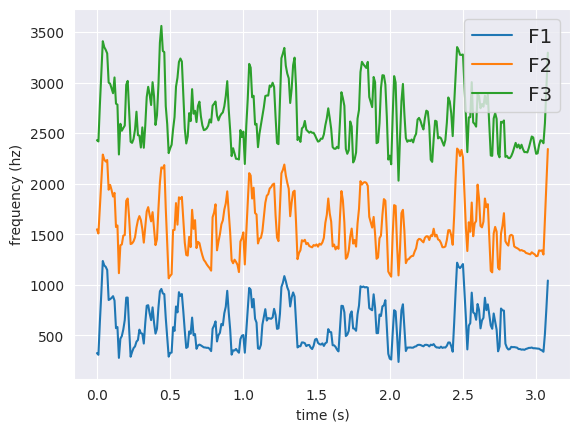

In [37]:
# plotting data
#plt.figure()
fig, ax = plt.subplots()
sns.lineplot(x='start', y='F1frequency_sma3nz', data=results, label='F1')
sns.lineplot(x='start', y='F2frequency_sma3nz', data=results, label='F2')
sns.lineplot(x='start', y='F3frequency_sma3nz', data=results, label='F3')
# fix x axis
# legend
plt.ylabel('frequency (hz)')
plt.xlabel('time (s)')
plt.legend(fontsize="x-large")